In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 128
epochs = 3
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
PATH = os.path.join( 'data/ipet')
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')            

In [4]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255
                    ,rotation_range=45
                    ,width_shift_range=.15
                    ,height_shift_range=.15
                    ,horizontal_flip=True
                    ,zoom_range=0.5
                              )

Found 596 images belonging to 2 classes.


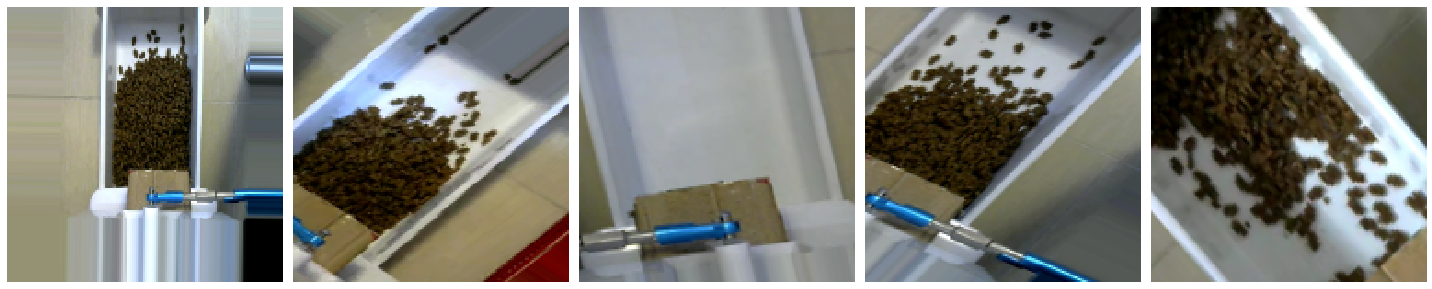

(128, 150, 150, 3)

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),    
                                                           class_mode='binary')
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])
sample_training_images.shape

In [8]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
val_data_gen = validation_image_generator.flow_from_directory(
                                                            directory=val_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),    
                                                           class_mode='binary')

Found 108 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0

In [10]:
history = model.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 4 steps
Epoch 1/3
5/5 [==============================] - 12s 2s/step - loss: 1.6224 - accuracy: 0.7399 - val_loss: 0.5696 - val_accuracy: 0.9352
Epoch 2/3
5/5 [==============================] - 10s 2s/step - loss: 0.3135 - accuracy: 0.9295 - val_loss: 0.4587 - val_accuracy: 0.9352
Epoch 3/3
5/5 [==============================] - 10s 2s/step - loss: 0.1383 - accuracy: 0.9698 - val_loss: 0.3377 - val_accuracy: 0.7870


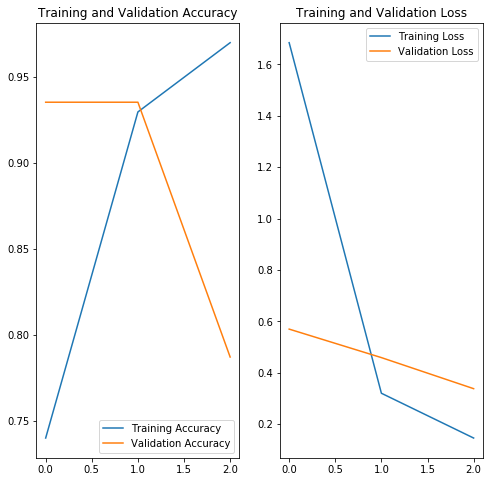

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
model.evaluate(val_data_gen) 

  ...
    to  
  ['...']
4/4 [==============================] - 1s 224ms/step - loss: 0.3377 - accuracy: 0.7870


[0.3377263471484184, 0.787037]

In [13]:
model.save("ipet_image_classifaction.h5")

In [16]:
model.predict(val_data_gen[0][0])

array([[-3.5065649 ],
       [16.242363  ],
       [-3.5283937 ],
       [-2.5683892 ],
       [ 3.9282696 ],
       [11.1445265 ],
       [-4.901319  ],
       [-3.524065  ],
       [-3.5376706 ],
       [-4.868674  ],
       [-0.10381315],
       [13.617405  ],
       [-3.5320287 ],
       [11.109218  ],
       [-5.0337667 ],
       [-3.2231593 ],
       [ 5.703258  ],
       [ 9.477835  ],
       [16.857975  ],
       [14.107257  ],
       [-3.503278  ],
       [17.683346  ],
       [-0.17123707],
       [ 3.9196813 ],
       [-3.4913542 ],
       [ 5.5013056 ],
       [ 2.3477101 ],
       [ 5.160197  ],
       [-3.499394  ],
       [12.051476  ],
       [-3.5021756 ],
       [-4.86774   ]], dtype=float32)